# Testing standard RSA situations using DWG

This jupyter notebook will present in detail how the DWG model presented in my PhD dissertation can successfully imitate standard RSA in the derivation of scalar implicatures.

Let's first load all the relevant classes and functions that we are going to use here.

In [8]:
# Import relevant classes and functions

from players import Player, Listener, HonestNdivSpeaker, HonestNdivSpeakerPlus
from helpers import *
from lexica import *
from viz import rsa_lis_viz, rsa_speak_viz


## Setting the message and personae sets and priors

We then list all the worlds, personae and messages we want to take into account in the model along with their semantics. We also set the $\Pi-LEX$ and $SOC-LEX$ functions, even though they will not be useful in that case, due to the fact that we assume that the utterances used in standard RSA scalar implicature games do not convey any social meaning.

In [10]:
# Available messages
messages = ["none", "some", "all"]

meanings = {
    "none": {"worlds": ["w0"], "personae": ["pi"]},
    "some": {"worlds": ["w1", "w2", "w3"], "personae": ["pi"]},
    "all": {"worlds": ["w3"], "personae": ["pi"]},
}

# Setting the priors.
# Define priors over possible worlds here, they have to add up to 1.
world_priors = {
    "w0": 1 / 4,
    "w1": 1 / 4,
    "w2": 1 / 4,
    "w3": 1 / 4,
}

# Define priors over personae here. They have to add up to 1.
pers_priors = {"pi": 1}

delta_soc = {"soc": 1}

pi_lex = {"pi": {"lex": 1}}

# Build priors as an instance of the Priors class.
priors = Priors(world_priors, pers_priors, delta_soc, pi_lex)

# Constructing lexica and storing in lists
socs = [Pers(meanings, "soc")]
lexs = [Lex(meanings, "lex")]


## Literal Listener
Let's see what the predictions are for a literal listener with our priors. We expect that there will be no meaningful predictions regarding personae (we have after all only one in $\Pi$ here). All utterances will equally predict that the speaker is displaying persona $\pi$.

We print these results for all messages for the sake of exhaustivity.

These do not seem interesting, but they are more important than it seems. Indeed, for the model to work at all, we *need* to have at least one possible persona in $\Pi$, otherwise the interpretation functions of the literal listener will not work due to division by 0. 

So we can set a world like this one, where there is only one possible persona, although we will see that because the information about personae is taken into account in the interpretation, it will lead to results that are different from standard RSA (though ultimately interpretable in the same way).


In [11]:
# Constructing Literal listener
lis0 = Player(priors)

# Predictions for pers
for m in messages:
    print(
        "When hearing message \'" +
    m + "\', the probability that a literal listener interprets the persona\
        displayed by the speaker as being \'\pi\' is equal to: " +
        str(lis0.general_social_interpretation("pi", m, socs))
        )

When hearing message 'none', the probability that a literal listener interprets the persona        displayed by the speaker as being '\pi' is equal to: 1.0
When hearing message 'some', the probability that a literal listener interprets the persona        displayed by the speaker as being '\pi' is equal to: 1.0
When hearing message 'all', the probability that a literal listener interprets the persona        displayed by the speaker as being '\pi' is equal to: 1.0


The more interesting part is checking whether we accurately predict scalar implicatures, which starts with ambiguity at the literal listener level. We generate all the relevant predictions and represent them using a barplot.

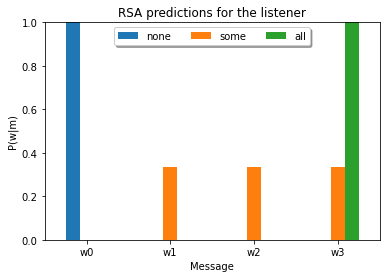

In [12]:
# Vizualize literal listener world interpretations
rsa_lis_viz(lis0, socs, lexs)

Looks the way it should!

# Speaker
Let's now see how a $S_1$ speaker behaves in the model. Again, we should observe the same results as what we do in standard RSA, so already at this stage the speaker should have a preference for 'some' only in cases where the quantity is neither 'none' (impossible) or 'all' (ambiguous). 

Although we do observe this pattern, due the presence of $\pi$ in the computations, the results are rather different from standard RSA at that stage.

We leave the $\alpha$ and $\beta$ parameters to their default value, $1$.

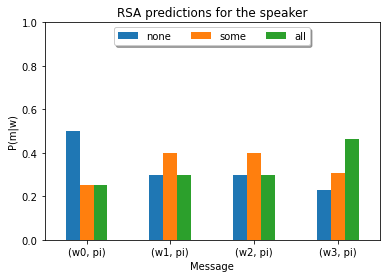

In [13]:
# Constructing the speaker
s1 = HonestNdivSpeaker(priors)

# Predictions for (worlds, personae) pairs
rsa_speak_viz(s1, socs, lexs)

As we can see, there is a tendency for the speaker to optimize for the proper communication of semantic content, but there is also a fairly large probability for them to use semantically inappropriate messages. This is due to the fact that the message itself conveys information about personae, invariably. This is a limitation of the model. 

## The Pragmatic Listener

Let's now test the interpretations of a pragmatic listener $L_1$ in this model. Because listeners in this model use both the social and content interpretations to make their estimations, we should observe the same uncertainty that we had with the $S_1$ speaker.

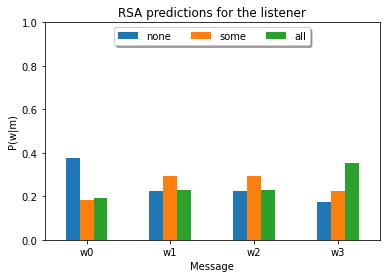

In [14]:

# Constructing the pragmatics listener
lis1 = Listener(priors)

# Predictions for worlds given messages
rsa_lis_viz(lis1, socs, lexs)

## Beyond

But are we stuck there? Some optimization is still happening, what happens if we take speakers and listeners beyond that level? If we look at a speaker $S_2$, for example, we can see that adding more layers of reasoning will simply increase uncertainty.

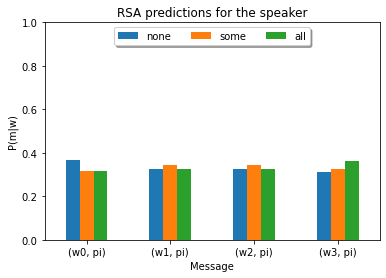

In [15]:
# Constructing S_2 speaker
s2 = HonestNdivSpeakerPlus(priors)

# Predictions for (worlds, personae) pairs
rsa_speak_viz(s2, socs, lexs)

Why is that? Because the speaker model *always* takes into account social meaning, and because none of the messages available carry any social meaning, in order to optimize $(w, \pi)$ pairs, the speaker will eventually find equilibrium on using more or less equally all options. Think of it that way: there are many imperfect messages, but there are no completely inadequate messages, since all convey at least part of what I am trying to say. 

How do we address this? Simple answer is: we don't! This is not a model for scalar implicatures after all, this feature will in fact come in handy when analyzing dogwhistles, and this model was constructed to analyze dogwhistles and nothing else. 

Pretty simple and more satisfactory answer would be: easy, we add more parameters to the model. Specifically, what we could do would be adding *sensitivity* parameters (see relevant section in chapter 5 of the dissertation). Basically, the sensitivity parameter is a real number that quantifies how sensitive to either social or content interpretation the speaker is. 

Let's do this and set that parameter to $1$ for content and to $0$ for social meaning.

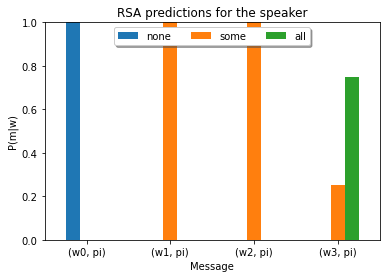

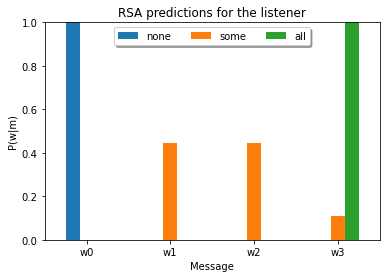

In [16]:
# Constructing a socially insensitive S_1 speaker
s1_update = HonestNdivSpeaker(priors, pers_sensitivity = 0, world_sensitivity = 1)

# Predictions for (worlds, personae) pairs
rsa_speak_viz(s1_update, socs, lexs)


# Constructing the socially insensitive pragmatics listener
lis1_update = Listener(priors, pers_sensitivity = 0, world_sensitivity = 1)

# Predictions for worlds given messages
rsa_lis_viz(lis1_update, socs, lexs)

Now as we can see, we have the exact same results as what we would have using the standard RSA approach. 

## Implementing standard SMG

Symmetrically, we could obtain the exact same results as the SMG implementation by reversing the sensitivity terms values and setting content sensitivity to 0 and setting social sensitivity to 1. As a sanity check, let's still try to do it. We use the Obama example from Burnett.